<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/ce_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

## **Caso de Estudio Modelo de Clasificación**

Resumen del trabajo presentado por:

- Walter Campos Blanco
- William Ramos Valladares

https://www.linkedin.com/in/wcamposblanco/

https://www.linkedin.com/in/william-valladares-26789797/


## **Análisis de Datos Segmentación de clientes potenciales (Customer Segmentation)**


### **Comprension del negocio**

**INTRODUCCION**

La segmentación de clientes es la práctica de dividir una base de clientes en grupos de individuos que son similares en aspectos específicos relevantes para el marketing, como la edad, el género, los intereses y los hábitos de gasto.

Las empresas que emplean la segmentación de clientes parten del hecho de que cada cliente es diferente, en preferencias y necesidades, y de que los esfuerzos de marketing se verían más favorecidos si se dirigen mensajes a grupos de segmentos específicos. 

**ENTORNO DE LA EMPRESA**

Una empresa de consumo tiene previsto entrar en nuevos mercados con sus productos actuales (P1, P2, P3, P4 y P5). Tras un intenso estudio de mercado, han deducido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En el mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D ). A continuación, han llevado a cabo una difusión y comunicación segmentada para un segmento diferente de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia para los clientes potenciales en los nuevos mercados.

**OBJETIVO**

En este proyecto de aprendizaje automático, nuestro objetivo es crear un modelo para predecir adecuadamente la Categorizacion/Clasificacion de los nuevos clientes.

### **Estructura del dataset**

***El conjunto de datos contiene información de clientes en 11 variables, donde 9 variables son caracteristicas demograficas, que permite a la empresa clasificar en segmentos de clientes para fines de marketing.***


- **ID:** Identificación única

- **Gender:** Género del cliente

- **Ever_Married:** Estado civil del cliente

- **Age:** Edad del cliente

- **Graduated:** ¿Es el cliente un graduado?

- **Profession:** Profesión del cliente

- **Work_Experience:** Experiencia laboral en años

- **Spending_Score:** Puntuación del gasto del cliente

- **Family_Size:** Número de miembros de la familia del cliente.

- **Var_1:** Categoría anónima del cliente

- **Segmentation:** (target) Segmento del cliente


### **Bibliotecas**

####**Instalando librerías**

In [1]:
# Para instalar pycaret 
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **Cargando librerias**

##### Para el análisis de datos y el conjunto de datos

In [3]:
# Para instalar procesamiento de datos 
import numpy as np
import pandas as pd

##### Para preprocesamiento y el modelo

In [4]:
#Importar la liberias de Pycaret
from pycaret.classification import *
from pycaret.utils import check_metric

'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.


In [5]:
from pycaret.classification.oop import *
LOGGER.disabled=True

##### Para gráficos

In [6]:
# Para instalar manejadores de graficos 
import plotly.express as px #Liberia para graficos 

### **Carga de Datos**

**Establecer la ruta de ubicacion del archivo con los datos**

In [7]:
# Creación del dataframe (en todas las celdas de código que se requieran)
archivo_url = "https://raw.githubusercontent.com/Emilca/Pstg_UNI_Ciencia_Datos/main/Datasets/Customer_segmentation/customer_segmentation_train_old.csv"

***Creación del DataFrame para un conjunto de datos determinado, en este caso usaré el conjunto de datos "Segmentation"***

In [8]:
data = pd.read_csv(archivo_url) #los datos están separados por comas
data.head(5) #vista del dataframe

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [9]:
print(" ")
print(f"El dataframe tiene {list(data.shape)[0]} filas y {list(data.shape)[1]} columnas")

 
El dataframe tiene 8068 filas y 11 columnas


### **Preparando datos del dataframe**

#### **Info del dataset**

In [10]:
data.info() #Muestra los nombres de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Verifica si hay valores NaN

In [11]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

<h4><b><font color="#024A86">
---> Existen valores nulos y puede existir valores duplicados

</font></b></h4>

#### **Limpiando el dataset**

Limpiando y rellenando con valores el dataset


In [12]:
#Limpiando el dataset con los valores más cercanos
#
#alguna vez casado
#data.fillna(value = {'Ever_Married':'N/A'})
data['Ever_Married'].fillna(method='ffill', inplace=True) 
#alguna vez graduado
data['Graduated'].fillna(method='ffill', inplace=True) 
#Profesion
data['Profession'].fillna(method='ffill', inplace=True) 
#Experienccia laboral
data['Work_Experience'].fillna(method='ffill', inplace=True) 
#Cantidad de familia
data['Family_Size'].fillna(method='ffill', inplace=True)
#Categoria
data['Var_1'].fillna(method='ffill', inplace=True)


Verificando si no hay valores nulos

In [13]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

#### **Eliminando duplicados**

In [14]:
data.drop_duplicates(inplace=True)

#### **Eliminando Variable Id**

**Eliminar columna ID porque es innecesaria al modelo**

In [15]:
data.drop(columns=["ID"], inplace=True) #Eliminado por nombre
#df = df.drop(axis=1, labels=['ID']) #Eliminado por numero de etiqueta

#### **Crear Dataframe con datos limpios**

**Respaldamos el dataframe para preprocedar columnas manualmente y luego ingrearlo en pycaret**

In [16]:
df = data.copy()
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


#### **Respaldamos Dataframe datos limpios**

In [17]:
df.to_csv('data_segmentacion.csv', index=False)

### **Visualizacion y Analisis de variables**

#### **Visualización**

**Análisis bivariado Gráfico de correlación con las variables numéricas**

In [18]:
# Calculate the correlation matrix
corr = round(df.corr(),4)

In [19]:
# Plot the heatmap
px.imshow(corr,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

**Análisis bivariado Gráfico de correlación con las variables categóricas**

In [20]:
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
numerical_features = ['Age', 'Work_Experience', 'Family_Size']

In [21]:
corr_2 = round(df[categorical_features + numerical_features].corr(method='spearman'), 4)

In [22]:
# Plot the heatmap
px.imshow(corr_2,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

##### **Distribucion de variables**

In [23]:
for i in data.columns:
  fig = px.histogram(data, 
               x = i,
               template="gridon",
               nbins=40)

  fig.update_layout(bargap=0.2)
  fig.show()


#### **Ingeniería de Variables**

*En el conjunto de datos hay variables categóricas por lo que, antes de entrenar el modelo, es necesario aplicar ténicas de one-hot-encoding...*

##### **Transformación Gender-Ever_Married-Graduated**

Las siguientes variables pueden ser codificadas en la etiqueta: Gender Ever_Married Graduated Spending_Score.

In [24]:
# Utilizamos Label encoding para las variables categoricas de dos valores (Si/No)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['Gender','Ever_Married','Graduated']
for col in columns:
    df[col] = le.fit_transform(df[col])

df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,A
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B
4,0,1,40,1,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,Artist,0.0,Low,7.0,Cat_1,D
8064,1,0,35,0,Executive,3.0,Low,4.0,Cat_4,D
8065,0,0,33,1,Healthcare,1.0,Low,1.0,Cat_6,D
8066,0,0,27,1,Healthcare,1.0,Low,4.0,Cat_6,B


##### **Transformación Profession**
Variables Profesion a aplicar One Hot Encoding

-- Revisar la distribucion de los datos para ver si los datos estan desbalanceados o no.

In [25]:
df['Profession'].value_counts()

Artist           2555
Healthcare       1353
Entertainment     963
Engineer          704
Doctor            703
Lawyer            636
Executive         605
Marketing         299
Homemaker         250
Name: Profession, dtype: int64

La variable "Profesión" tiene 9 categorías. Pero sólo las 3 iniciales son las de mayor frecuencia. Por lo tanto, el resto se agrupa en una nueva categoría denominada "Other".

In [26]:
df['Profession'] = df['Profession'].replace(['Lawyer','Executive','Marketing','Homemaker'],'Other')

In [27]:
#df = pd.get_dummies(df, columns = ['Profession'])
df['Profession'] = df['Profession'].map({'Artist': 0, 'Healthcare':1, 'Entertainment':2, 'Engineer': 3, 'Doctor':4, 'Other':5}) 

##### **Transformación Var_1**
Variables Var_1 a aplicar One Hot Encoding.

Revisar la distribucion de los datos para ver si los datos estan desbalanceados o no.

In [28]:
df['Var_1'].value_counts()

Cat_6    5287
Cat_4    1097
Cat_3     827
Cat_2     430
Cat_7     206
Cat_1     135
Cat_5      86
Name: Var_1, dtype: int64

La variable "Var_1" tiene 7 categorías. Pero sólo las 3 iniciales son las de mayor frecuencia. Por lo tanto, el resto se agrupa en una nueva categoría denominada "Other".

In [29]:
df['Var_1'] = df['Var_1'].replace(['Cat_5','Cat_1','Cat_7','Cat_2'],'Other')
df['Var_1'].value_counts()

Cat_6    5287
Cat_4    1097
Other     857
Cat_3     827
Name: Var_1, dtype: int64

Existen dos variables categóricas adicionales: Profesión y Var_1. 
Como son variables nominales, hay que apicarles la tecnica One Hot Encoding (Variables Dummies)

In [30]:
#df = pd.get_dummies(df, columns = ['Var_1'])
df['Var_1'] = df['Var_1'].map({'Cat_1': 0, 'Cat_2':1, 'Cat_3':2, 'Cat_4': 3, 'Cat_5':4, 'Cat_6':5, 'Cat_7':6}) 

##### **Transformación 4-Spending_Score**
Variables Spending_Score a aplicar transformación.

La variable 'Spending_Score' tiene tres valores : Low, Average and High. Como son variables ordinales, las codificare por separado.

In [31]:
df['Spending_Score'] = df['Spending_Score'].map({'Low': 0, 'Average':1, 'High':2}) 

##### **Transformación 5-Segmentation**
Variable Segmentation a aplicar transformación.

La variable 'Segmentation' tiene los valores : A, B, C, D. Como son variables ordinales, las codificare por separado.

In [32]:
df['Segmentation'] = df['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [33]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,1,1.0,0,4.0,3.0,3
1,0,1,38,1,3,1.0,1,3.0,3.0,0
2,0,1,67,1,3,1.0,0,1.0,5.0,1
3,1,1,67,1,5,0.0,2,2.0,5.0,1
4,0,1,40,1,2,0.0,2,6.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0,0.0,0,7.0,NaN,3
8064,1,0,35,0,5,3.0,0,4.0,3.0,3
8065,0,0,33,1,1,1.0,0,1.0,5.0,3
8066,0,0,27,1,1,1.0,0,4.0,5.0,1


#### **Correlación de las variables numéricas**

In [77]:
#Creamos objeto de correlacion por Pearson
corr_matrix = round(df.select_dtypes(include=['float64', 'int']).corr(method='pearson'), 2)

In [35]:
px.imshow(corr_matrix,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

#### **<h2>Análisis de EDA</h2>**

<h4><b><font color="#024A86">
1.   Entre las variables no existe mucha correlacion.
</h4></b></font>
<h4><b><font color="#024A86">
2.   Existen valores NaN en columnas 
Ever_Married,
Graduated,
Profession,
Var_1,
Work_Experience,
Family_Size.
</h4></b></font>
<h4><b><font color="#024A86">
3.   Existen 7 Variables string y 4 variables numericas.
<h4><b><font color="#024A86">
4.   La variable objetivo es multi categorica
<h4><b><font color="#024A86">
5.   Existen Profeson, Var_1 y Spending_Score multi categorica.
<h4><b><font color="#024A86">
6.   Existen 3 variables Si/No (Gender, Ever_Married, Graduated) y 4 variables multi categoricas.
<h4><b><font color="#024A86">
7.   Las variables que tiene mas correlacion con la variable objetivo que es segmento son Ever_Married, Age, Graduated, Spending_Score, Family_Size.
</font></b></h4>


**<h3>Observaciones:</h3>**

<h4><b><font color="#024A86">
- Ever_Married - Los clientes no casados suelen estar en el segmento D mientras que los casados están en el segmento A, B o C.
</h4></b></font>
<h4><b><font color="#024A86">
- Graduated - Los clientes graduados suelen estar en el segmento A, B o C mientras que los no graduados están en el segmento D.
<h4><b><font color="#024A86">
- Profession: Las profesiones de salud tienen peor califcacion y los artistas la mejor calificacion de segmento.
</h4></b></font>
<h4><b><font color="#024A86">
- Spending_Score - Los clientes que gastan poco suelen estar en los segmentos D, mientras que los que gastan mucho y de forma media están en los segmentos A, B o C.
</h4></b></font>
<h4><b><font color="#024A86">
- Work_Experience - Las mujeres entre mas experiencia laboral tienen se ubican en mejor segmento.
</h4></b></font>

**<h3>Observaciones:</h3>**

<h4><b><font color="#024A86">
- Age: <30 están en el segmento D, 30-40 o >70 están en el segmento A mientras que 45-70 están en el segmento C
</h4></b></font>
<h4><b><font color="#024A86">
- Work_Experience:  <2 están en el segmento C mientras que 6-11 están en el segmento A y D
</h4></b></font>
<h4><b><font color="#024A86">
- Family_Size:  <1 están en el segmento A, 1-3 están en el segmento C y 4+ en el segmento D
</h4></b></font>

## **Modelo de Clasificacion**


### **Preparando el Dataframe**

Recuperamos el dataset sin ingenieria de variables para generar un modelo con columnas originales.

In [36]:
#df_data = df.copy()
df_data = data.copy()

Agrupar la columna Var_1.

In [37]:
df_data['Var_1'] = df_data['Var_1'].replace(['Cat_5','Cat_1','Cat_7','Cat_2'],'Other')

Agrupar la columna Profession.

In [38]:
df_data['Profession'] = df_data['Profession'].replace(['Lawyer','Executive',
                                                       'Marketing','Homemaker'],'Other')

**Columnas calculadas**

**Importante:** Se valido en el modelo y no hubo mejoria en la probabilidad de prediccion. 

In [39]:
df_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Other,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


## **Configuración de PyCaret**

In [40]:
# Configurando PyCaret para trabajar (en todas las celdas de código que se requieran)
from pycaret.classification import *

### **Preparando train y test**

Separamos los datos de entrenamiento y datos no vistos por el modelo que utilizaremos cuando probemos en produccion el modelo final

In [41]:
train = df_data.sample(frac=0.90, random_state=0)
test = df_data.drop(train.index)

Reseteamos los indices de las columnas

In [42]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [43]:
print("Datos para Modelar: " + str(train.shape))
print("Datos no vistos para Predicción: " + str(test.shape))

Datos para Modelar: (7261, 10)
Datos no vistos para Predicción: (807, 10)


In [44]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,Yes,72,Yes,Other,3.0,High,2.0,Cat_6,C
1,Male,No,20,No,Other,1.0,Low,3.0,Cat_4,D
2,Male,Yes,52,Yes,Other,7.0,High,4.0,Cat_4,C
3,Male,No,47,Yes,Entertainment,2.0,Low,1.0,Other,A
4,Male,Yes,49,Yes,Artist,1.0,Low,4.0,Cat_3,C


Guardar el archivo train y test con los datos preprocesados para utilizarlos en Power BI

In [45]:
train.to_csv('train_emp_pre.csv', index=False)

In [46]:
test.to_csv('test_emp_pre.csv', index=False)

## **Configurar setup del modelo**

Ejecutamos setup de Pycaret, proponiendo como variable dependiente *Segmentation*. Dejaremos que Pycaret transforme las variables categoricas con transformacion Dummies o Onehot Encoding

In [47]:
cat_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

In [48]:
modelo_setup = setup(data = train, target = "Segmentation", train_size = 0.7, session_id = 0,
                     #categorical_features = cat_features,
                     normalize = True, 
                     imputation_type="iterative", 
                     transformation = True
                     )
#,feature_selection = True #Elimina caracteristicas por debajo del umbral de correlacion.
#fix_imbalance = True , will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.
#ignore_low_variance = True
#,multicollinearity_threshold = True #Evalua la exactitud de la prediccion.
#multicollinearity_threshold = 0.95 as inter-correlaciones más altas que el umbral definido se eliminan
#remove_multicollinearity = True,
#remove_outliers = True


,Description,Value
0,Session id,0
1,Target,Segmentation
2,Target type,Multiclass
3,Target mapping,"A: 0, B: 1, C: 2, D: 3"
4,Original data shape,"(7261, 10)"
5,Transformed data shape,"(9440, 15)"
6,Transformed train set shape,"(5082, 15)"
7,Transformed test set shape,"(4358, 15)"
8,Ordinal features,3
9,Numeric features,3


In [49]:
modelo_setup.X_train_transformed

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score_Low,Spending_Score_High,Spending_Score_Average,Family_Size,Var_1_Cat_6,Var_1_Cat_3,Var_1_Cat_4,Var_1_Other
0,-1.103742,-1.181541,0.144527,0.792998,-0.618111,-0.073726,0.802245,-0.420959,-0.563564,-1.534408,0.725030,-0.343374,-0.396031,-0.339783
1,0.906009,0.846352,1.510256,-1.261037,0.550114,-1.188259,-1.246503,2.375529,-0.563564,-0.443331,0.725030,-0.343374,-0.396031,-0.339783
2,-1.103742,0.846352,0.083278,-1.261037,-1.216447,-0.073726,0.802245,-0.420959,-0.563564,0.301500,0.725030,-0.343374,-0.396031,-0.339783
3,-1.103742,-1.181541,-0.315483,0.792998,0.544146,-1.188259,0.802245,-0.420959,-0.563564,-0.443331,-1.379254,2.912275,-0.396031,-0.339783
4,0.906009,-1.181541,0.263145,0.792998,-0.618111,-0.073726,0.802245,-0.420959,-0.563564,-0.443331,0.725030,-0.343374,-0.396031,-0.339783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,0.906009,0.846352,0.020656,0.792998,1.733286,-0.073726,-1.246503,-0.420959,1.774421,0.863047,0.725030,-0.343374,-0.396031,-0.339783
5078,0.906009,-1.181541,-0.781359,0.792998,-1.200451,-1.188259,0.802245,-0.420959,-0.563564,0.863047,0.725030,-0.343374,-0.396031,-0.339783
5079,0.906009,-1.181541,-0.617179,-1.261037,-0.618111,0.737776,0.802245,-0.420959,-0.563564,2.001204,-1.379254,-0.343374,2.525056,-0.339783
5080,0.906009,-1.181541,-0.538614,-1.261037,-1.200451,-0.073726,0.802245,-0.420959,-0.563564,-0.443331,0.725030,-0.343374,-0.396031,-0.339783


## **Comparar modelos**

Procesamos para encontrar el mejor modelo

In [50]:
mejor_modelo = compare_models(n_select=3, fold = 10 ) #Comparamos modelos para saber cual crear Ejemnplo: , sort = 'Recall'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4943,0.7472,0.4943,0.4810,0.4752,0.3216,0.3268,1.0510
lda,Linear Discriminant Analysis,0.4935,0.7459,0.4935,0.4833,0.4781,0.3212,0.3260,0.1590
ridge,Ridge Classifier,0.4906,0.0000,0.4906,0.4670,0.4553,0.3144,0.3234,0.1980
nb,Naive Bayes,0.4721,0.7359,0.4721,0.4416,0.4401,0.2889,0.2966,0.3240
svm,SVM - Linear Kernel,0.4652,0.0000,0.4652,0.4414,0.4261,0.2803,0.2912,0.4240
qda,Quadratic Discriminant Analysis,0.4579,0.7278,0.4579,0.4768,0.4495,0.2771,0.2866,0.1520
knn,K Neighbors Classifier,0.4543,0.7108,0.4543,0.4654,0.4573,0.2723,0.2733,0.4170
et,Extra Trees Classifier,0.4465,0.7304,0.4465,0.4597,0.4457,0.2623,0.2658,0.6360
rf,Random Forest Classifier,0.3788,0.6593,0.3788,0.4177,0.3776,0.1764,0.1832,0.6760
dummy,Dummy Classifier,0.2820,0.5000,0.2820,0.0795,0.1240,0.0000,0.0000,0.3980


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

## **Crear Modelo**

Creamos el modelo en base a la comparacion hecha por el metodo setup

In [51]:
modelo = create_model("lr")
#print(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4695,0.7237,0.4695,0.4462,0.4467,0.2869,0.2916
1,0.5010,0.7519,0.5010,0.4933,0.4863,0.3312,0.3359
2,0.5157,0.7524,0.5157,0.4976,0.4931,0.3504,0.3567
3,0.5020,0.7544,0.5020,0.4832,0.4834,0.3320,0.3363
4,0.5138,0.7550,0.5138,0.4897,0.4912,0.3483,0.3541
5,0.5177,0.7565,0.5177,0.5317,0.4969,0.3520,0.3602
6,0.5000,0.7655,0.5000,0.4764,0.4804,0.3291,0.3329
7,0.4587,0.7240,0.4587,0.4364,0.4343,0.2739,0.2796
8,0.4685,0.7351,0.4685,0.4657,0.4586,0.2886,0.2925


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

##**Optimizar el modelo**

Optimizamos el modelo seleccionado considerando el tipo de optimizacion deseada.

In [52]:
modelo_optimizado = tune_model(modelo, fold=10, optimize = 'Precision')
#print(modelo_optimizado)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4735,0.7236,0.4735,0.4558,0.4606,0.2940,0.2960
1,0.4872,0.7515,0.4872,0.4864,0.4835,0.3143,0.3159
2,0.5098,0.7517,0.5098,0.4990,0.4988,0.3438,0.3468
3,0.5000,0.7539,0.5000,0.4883,0.4910,0.3307,0.3324
4,0.5079,0.7546,0.5079,0.4951,0.4942,0.3415,0.3457
5,0.5157,0.7568,0.5157,0.5174,0.5042,0.3507,0.3556
6,0.5020,0.7658,0.5020,0.4849,0.4899,0.3330,0.3350
7,0.4547,0.7238,0.4547,0.4413,0.4418,0.2699,0.2728
8,0.4705,0.7348,0.4705,0.4766,0.4677,0.2924,0.2952


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


##**Ensamblado de modelos**

Utilizamos los métodos de ensamble de modelos para ayudar a mejorar el rendimiento de los modelos al mejorar su precisión.

### **-Bagging**
- Multiples Modelos con distintos datos

In [53]:
bagged_modelo = ensemble_model(modelo_optimizado, method = 'Bagging',)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4617,0.7237,0.4617,0.4444,0.4494,0.2784,0.2802
1,0.4912,0.7519,0.4912,0.4917,0.4879,0.3195,0.3212
2,0.5098,0.7505,0.5098,0.4979,0.4985,0.3437,0.3465
3,0.5020,0.7532,0.5020,0.4894,0.4927,0.3332,0.3348
4,0.4980,0.7537,0.4980,0.4808,0.4834,0.3283,0.3319
5,0.5157,0.7561,0.5157,0.5167,0.5057,0.3508,0.3550
6,0.4941,0.7664,0.4941,0.4769,0.4822,0.3223,0.3240
7,0.4606,0.7222,0.4606,0.4487,0.4502,0.2780,0.2801
8,0.4665,0.7334,0.4665,0.4729,0.4641,0.2871,0.2897


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### **-Boosting**
- Multiples Modelos y aprende del anterior. No utilizando porque no hay pesos en clases Target

In [54]:
boosted_modelo = ensemble_model(modelo_optimizado, method = 'Boosting')
#Estimator not supported for the Boosting method. Change the estimator or method to 'Bagging'.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4656,0.7107,0.4656,0.4551,0.4586,0.2842,0.2850
1,0.4931,0.7439,0.4931,0.4909,0.4913,0.3223,0.3227
2,0.4961,0.7468,0.4961,0.4888,0.4898,0.3258,0.3273
3,0.4961,0.7504,0.4961,0.4881,0.4907,0.3257,0.3264
4,0.4980,0.7430,0.4980,0.4956,0.4934,0.3286,0.3307
5,0.5118,0.7450,0.5118,0.5155,0.5058,0.3458,0.3490
6,0.4724,0.7522,0.4724,0.4623,0.4662,0.2938,0.2943
7,0.4587,0.7228,0.4587,0.4507,0.4520,0.2758,0.2771
8,0.4646,0.7329,0.4646,0.4690,0.4629,0.2842,0.2859


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### **-Blending**
- Multiples Modelos para crear votacion

In [55]:
blend_soft_modelo = blend_models(estimator_list = [modelo_optimizado], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4735,0.7236,0.4735,0.4558,0.4606,0.2940,0.2960
1,0.4872,0.7515,0.4872,0.4864,0.4835,0.3143,0.3159
2,0.5098,0.7517,0.5098,0.4990,0.4988,0.3438,0.3468
3,0.5000,0.7539,0.5000,0.4883,0.4910,0.3307,0.3324
4,0.5079,0.7546,0.5079,0.4951,0.4942,0.3415,0.3457
5,0.5157,0.7568,0.5157,0.5174,0.5042,0.3507,0.3556
6,0.5020,0.7658,0.5020,0.4849,0.4899,0.3330,0.3350
7,0.4547,0.7238,0.4547,0.4413,0.4418,0.2699,0.2728
8,0.4705,0.7348,0.4705,0.4766,0.4677,0.2924,0.2952


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [56]:
#blend_hard_modelo = blend_models(estimator_list = [modelo_optimizado], method = 'hard')

### **-Stacking**
- Multiples Modelos como input del modelo final

In [57]:
stacking_soft_model = stack_models(estimator_list = [modelo_optimizado])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4774,0.7309,0.4774,0.4490,0.4511,0.2970,0.3024
1,0.4872,0.7572,0.4872,0.4730,0.4666,0.3122,0.3181
2,0.5098,0.7552,0.5098,0.4891,0.4851,0.3421,0.3490
3,0.5059,0.7625,0.5059,0.4839,0.4840,0.3370,0.3422
4,0.5138,0.7564,0.5138,0.4851,0.4828,0.3477,0.3572
5,0.5059,0.7609,0.5059,0.4979,0.4815,0.3361,0.3442
6,0.5079,0.7748,0.5079,0.4790,0.4776,0.3388,0.3464
7,0.4606,0.7293,0.4606,0.4318,0.4313,0.2761,0.2831
8,0.4665,0.7392,0.4665,0.4575,0.4486,0.2851,0.2920


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

*** El mejor emsamblando es: stacking_soft_model***

- Mejora la metrica Accurancy y Precision del modelo

In [58]:
modelo_ensamblado = stacking_soft_model

## **Graficar el modelo**

**Curva ROC**

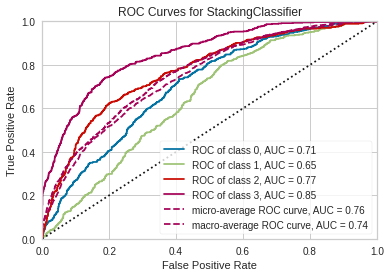

In [59]:
plot_model(modelo_ensamblado, plot = "auc" )

**Precision Recall Curve**

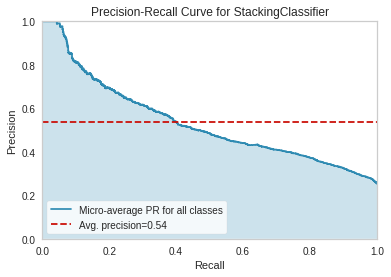

In [60]:
plot_model(modelo_ensamblado, plot = "pr")

**Tuned_custom_model**

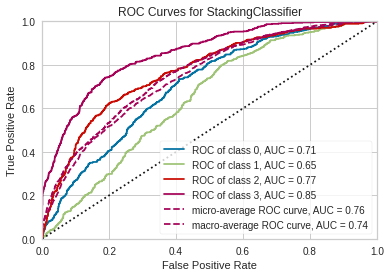

In [61]:
plot_model(modelo_ensamblado)

**Matriz de Confusión**

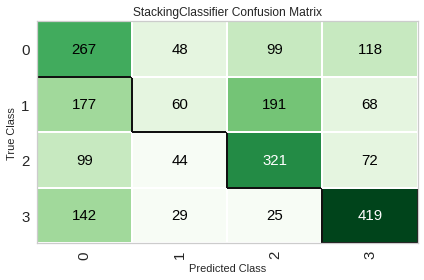

In [62]:
plot_model(modelo_ensamblado, plot = "confusion_matrix")

**Intepretación de la Matriz de Confusión - Confusion 
Matrix**

- TN y TP - Acurrancy: Se puede observar que hay mayor efectividad de Verdaderos positivos y Falsos Positivos en la prediccion en las clases A(0), B(2), C(2), D(3), los que son Verdadero Positivo.

- Falso Negativos (FN) - Recall (Bajo Recall - Sesgo): 
  - La clase real "A" (532 muestras) tiende dificultad para predecir (distinguir), hacia la clase D(118), C(99) y B(48) en ese orden de prioridad. 
  - La Clase real "B" tiende dificultad para predecir (distinguir), hacia la clase C, A y D en ese orden de prioridad. 
  - La Clase real "C" tiende dificultad para predecir (distinguir), hacia la clase A, D  y C en ese orden de prioridad.
  - La clase real "D" tiende dificultad para predecir (distinguir), hacia la clase A, B, y C en ese orden de prioridad.

- Falso Negativos (FP) - Precision (Baja Precision - Varianza): 
  - La prediccion clase A (685 muestras) tiende a ser menos confiable (seguro) hacia la clase B(117), D(142) y C(99) en ese orden. 
  - La prediccion Clase B tiende a ser menos confiable (seguro) hacia la clase A, C y D en ese orden. 
  - La prediccion Clase C tiende a ser menos confiable (seguro) hacia la clase B, A y D en ese orden.
  - La prediccion clase D tiende a ser menos confiable (seguro) hacia la clase la clase B, D y C en ese orden.


**Curva de aprendizaje**

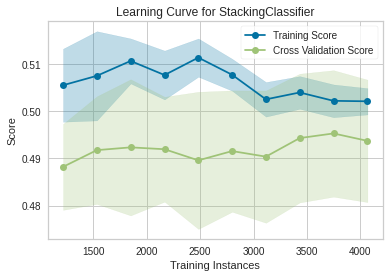

In [63]:
plot_model(modelo_ensamblado, plot = "learning")

**Importancia variables**

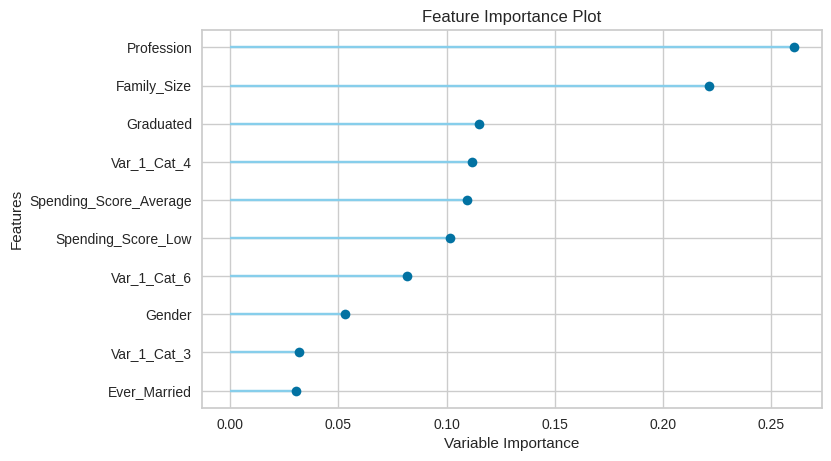

In [64]:
plot_model(modelo_optimizado, plot = "feature")

**Threshold**

- Importante: Como la varaible objetivo es tiene una Clasificación multiclase, (A,B,C,D), este grafico no se permite

In [79]:
#plot_model(modelo, plot = "threshold")

##**Evaluar el modelo**

Analizar el rendimiento del mejor modelo entrenado

In [66]:
evaluate_model(modelo_ensamblado, fold = 10)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##**Finalizar Modelo**

In [67]:
modelo_final = finalize_model(modelo_ensamblado)

##**Predecir modelo**

In [68]:
predict_test = predict_model(modelo_ensamblado, data = test)
#predict_model(modelo_optimizado)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.4944,0.7462,0,0,0,0.3273,0.3397


Resultado de predicción

In [69]:
results = pull()
results.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.4944,0.7462,0,0,0,0.3273,0.3397


In [70]:
from pycaret.utils import check_metric
check_metric(predict_test.Segmentation, predict_test.Label, 'Accuracy')

0.4944

In [71]:
predict_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score_Low,Spending_Score_High,Spending_Score_Average,Family_Size,Var_1_Cat_6,Var_1_Cat_3,Var_1_Cat_4,Var_1_Other,Segmentation,Label,Score
0,0.906009,-1.181541,-1.558596,-1.261037,1.732100,-0.073726,0.802245,-0.420959,-0.563564,0.863047,-1.379254,-0.343374,2.525056,-0.339783,D,D,0.8873
1,-1.103742,-1.181541,-2.050387,-1.261037,1.732100,0.737776,0.802245,-0.420959,-0.563564,0.863047,0.725030,-0.343374,-0.396031,-0.339783,D,D,0.8761
2,-1.103742,-1.181541,0.931910,-1.261037,0.550114,-0.073726,-1.246503,-0.420959,1.774421,0.301500,-1.379254,2.912275,-0.396031,-0.339783,B,B,0.3296
3,0.906009,0.846352,0.838781,-1.261037,-0.626983,-0.073726,-1.246503,-0.420959,1.774421,0.301500,0.725030,-0.343374,-0.396031,-0.339783,C,C,0.3426
4,0.906009,0.846352,0.838781,0.792998,0.553086,-0.073726,-1.246503,2.375529,-0.563564,-0.443331,0.725030,-0.343374,-0.396031,-0.339783,A,B,0.3479


Guardamos los datos de predicción para resultado de la predicción

In [72]:
predict_test.to_excel("Datos_Prediccion_entrenamiento.xlsx")

##**Guardar Modelo**

In [73]:
save_model(modelo_final, 'Modelo_Segmentacion_Customer')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('iterative_imputer',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=IterativeImputer(add_indicator=False,
                                                                  cat_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                               class_weight=None,
                                                                                               colsample_by...
                                                                     verbose=0,
                                                                     warm_start=False))],
                                     final_estimator=Logisti

## **Produccion**

### **Accediendo al modelo**

In [74]:
saved_modelo = load_model("Modelo_Segmentacion_Customer")

Transformation Pipeline and Model Successfully Loaded


### **Creando registro de cliente para evaluar**

In [75]:
cliente_nuevo = pd.DataFrame({'Gender'                : ['Male'],
                              'Ever_Married'       	  : ['Yes'],
                              'Age'	                  : [40],
                              'Graduated'	            : ['Yes'],
                              'Profession'            : ['Artist'],	
                              'Work_Experience'       : [10],
                              'Spending_Score'      	: ['High'],
                              'Family_Size'     	    : [9],
                              'Var_1'	                : ['Cat_5']})

cliente_nuevo

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,Yes,40,Yes,Artist,10,High,9,Cat_5


### **Mostrando la predicción**

Ingresando los datos del cliente al modelo

In [76]:
nueva_prediccion = predict_model( saved_modelo, data = cliente_nuevo) #, probability_threshold = 0.4)
nueva_prediccion.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score_Low,Spending_Score_High,Spending_Score_Average,Family_Size,Var_1_Cat_6,Var_1_Cat_3,Var_1_Cat_4,Var_1_Other,Label,Score
0,0.906184,0.844097,-0.037246,0.780325,-0.558941,1.546491,-1.235849,2.362828,-0.567755,2.530225,-1.383374,-0.336867,-0.396631,-0.343169,C,0.4028


#**Conclusiones**

1.  **Podemos concluir que las caracteristicas con mayor importancia en el modelo son: Profession. Family_size, Graduated y Spending_score**
2. **El utilizar el metodo ffill para el relleno de datos contribuyo a una considerable mejoria en el modelo.**

1. **Se seleccionar modelo lr - Logistic Regression" por lo siguiente:**
  - **Enfocan en disminuir el sesgo.**
  - **Se utiliza el mejor Acurrancy considerando que la variable objetivo tiene una distribucion equilibrada.**
  - ***Se ajusta los datos de train / test a 80/20 con mejores resultados.***
  - ***La velocidad de procesamiento del modelo es de la mas baja..***

2. **El modelo base es capaz de predecir en un 49 % de las observaciones del conjunto de datos de prueba y mejora a 50.al optimizar el modelo.**.

2. **Los resultados del modelo no son tan buenos en las categorias B y C.**

5. **No hubo mejoría en el modelo al utilizar las Variable: Age, Work Experience y Family_size, para generar una categoría "bin" (es necesario realizar más comprobaciones).**

5. **Para crear un modelo más robusto es necesario: (1) más datos sobre los clientes, (2) si hay más características relevantes**

3. **Los datos son insuficientes para mejorar el modelo, como nos sugiere la grafica de Curva de aprendizaje.**



